In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [3]:
df= pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
#To make the rating column float and remave the denominator 
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return value
df["rate"]=df["rate"].apply(handleRate)

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:

max_votes=df["votes"].max()
max_votes
rest=df.loc[df["votes"]==max_votes,"name"]
rest1=str(rest).split(" ")[4]
print(f"Restaurants with max votes :{rest1} with votes={max_votes}")
print(rest1)

Restaurants with max votes :Empire with votes=4884
Empire


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14104\1429192002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["online_order"],palette=["red","green"])


<Axes: xlabel='online_order', ylabel='count'>

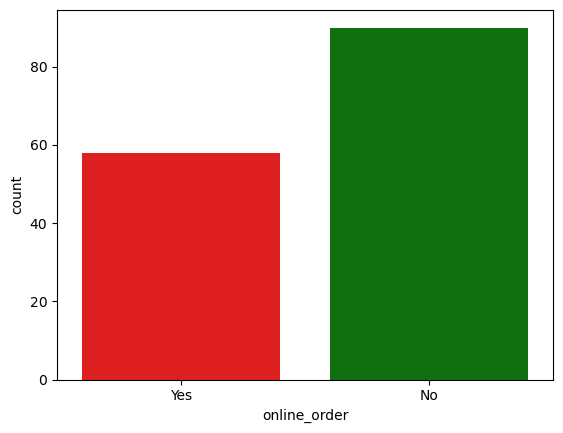

In [8]:
sns.countplot(x=df["online_order"],palette=["red","green"])

Text(0.5, 0, 'Types of restorant')

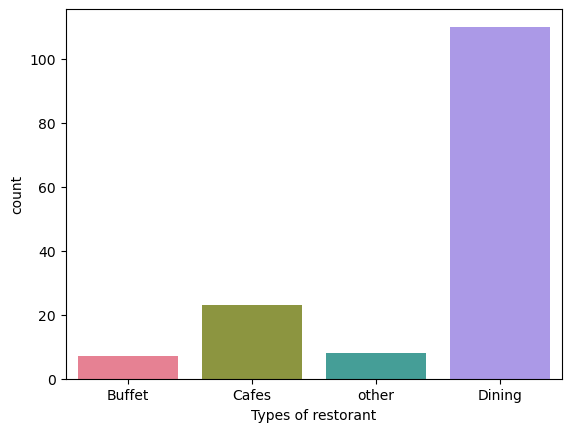

In [9]:
sns.countplot(data=df,x='listed_in(type)', hue='listed_in(type)',palette='husl',legend=False)
plt.xlabel("Types of restorant")

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


<Axes: xlabel='listed_in(type)'>

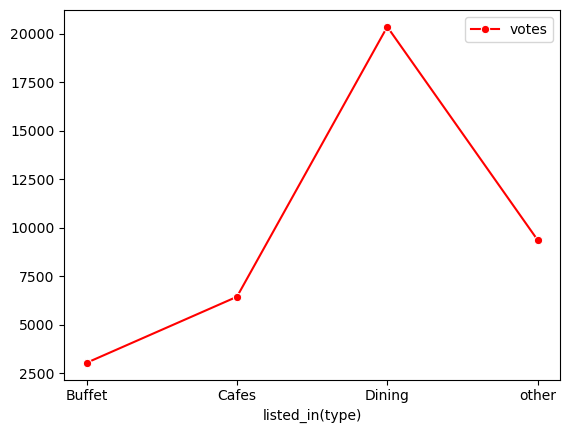

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
print(grouped_data)
result=pd.DataFrame(grouped_data)
sns.lineplot(data=result,palette=["red"],markers='o')

(array([19., 15., 11., 12.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

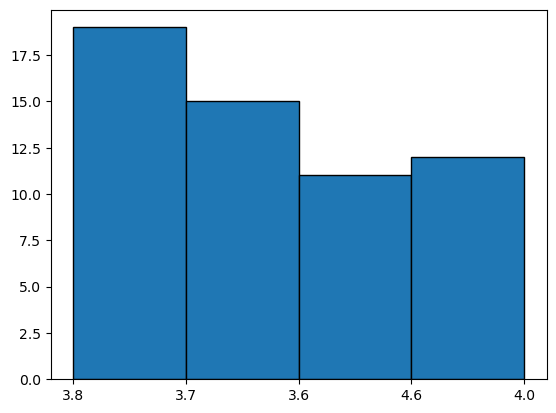

In [28]:
data=df["rate"]
bins=[1,2,3,4,5]
plt.hist(data,bins=bins,edgecolor="black")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

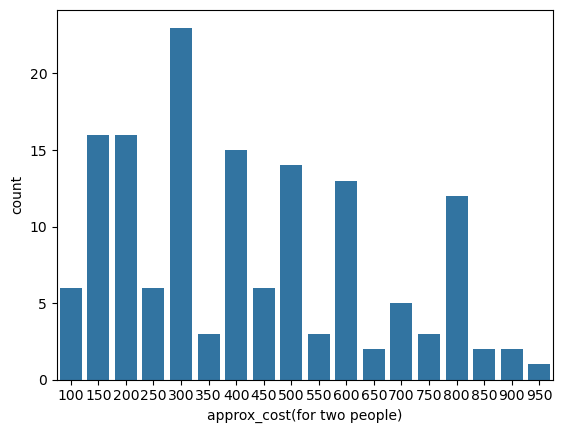

In [32]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data,color=)

In [36]:
df["approx_cost(for two people)"].unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100, 350, 250, 950], dtype=int64)

<Axes: xlabel='online_order', ylabel='rate'>

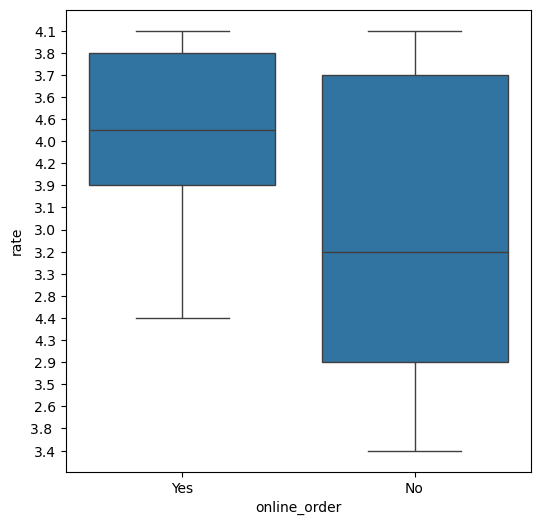

In [38]:
#examine whether online orders receive higher ratings than offline orders.
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)